# Examine live strategy 2

In the [previous example](https://tradingstrategy.ai/docs/programming/strategy-examples/examine-live-strategy.html), we manually downloaded the relevant candles for the live strategy, and overlaid the strategy trading data on these candles. 

However, we can also derive the candle universe from the live strategy state itself. This is useful if we want to examine the live strategy state in more detail e.g. plot the technical indicators used in decision making.

### Download state

First, we download the state from the live strategy endpoint. It comes back as json data.

In [1]:
import requests
from tradeexecutor.state.state import State

total_downloaded = 0

def download_state(url) -> State:
    global total_downloaded
    resp = requests.get(f"{url}/state")

    if len(resp.content) == 0:
        raise RuntimeError(f"Could not download: {url}")

    try:
        state = State.read_json_blob(resp.text)
    except Exception as e:
        raise RuntimeError(f"Could not decode: {url}") from e
    total_downloaded += len(resp.content)
    return state

state = download_state("https://enzyme-polygon-multipair.tradingstrategy.ai/")

print(f"Downloaded {total_downloaded:,} bytes")

/usr/local/lib/python3.10/site-packages/dataclasses_json/core.py:171: RuntimeWarning: `NoneType` object value of non-optional type initial_cash detected when decoding TradeSummary.
  warnings.warn(f"`NoneType` object {warning}.", RuntimeWarning)


Downloaded 2,747,200 bytes


### Get trading universe from state

Using the `reverse_trading_universe_from_state` method, we can derive the trading universe from the state.

In [2]:
from tradeexecutor.strategy.reverse_universe import reverse_trading_universe_from_state
from tradingstrategy.client import Client
from tradingstrategy.timebucket import TimeBucket

client = Client.create_jupyter_client()
time_bucket = TimeBucket.h1
universe = reverse_trading_universe_from_state(state, client, time_bucket)

Started Trading Strategy in Jupyter notebook environment, configuration is stored in /root/.tradingstrategy


### Visualise live strategy

Plotting the live strategy, we can see more detail than possible in the previous example. All indicators are shown for the relevant pairs, giving further insight into the strategy's decision making. Also, the pair data does not need to be downloaded manually.

Trades will not be shown


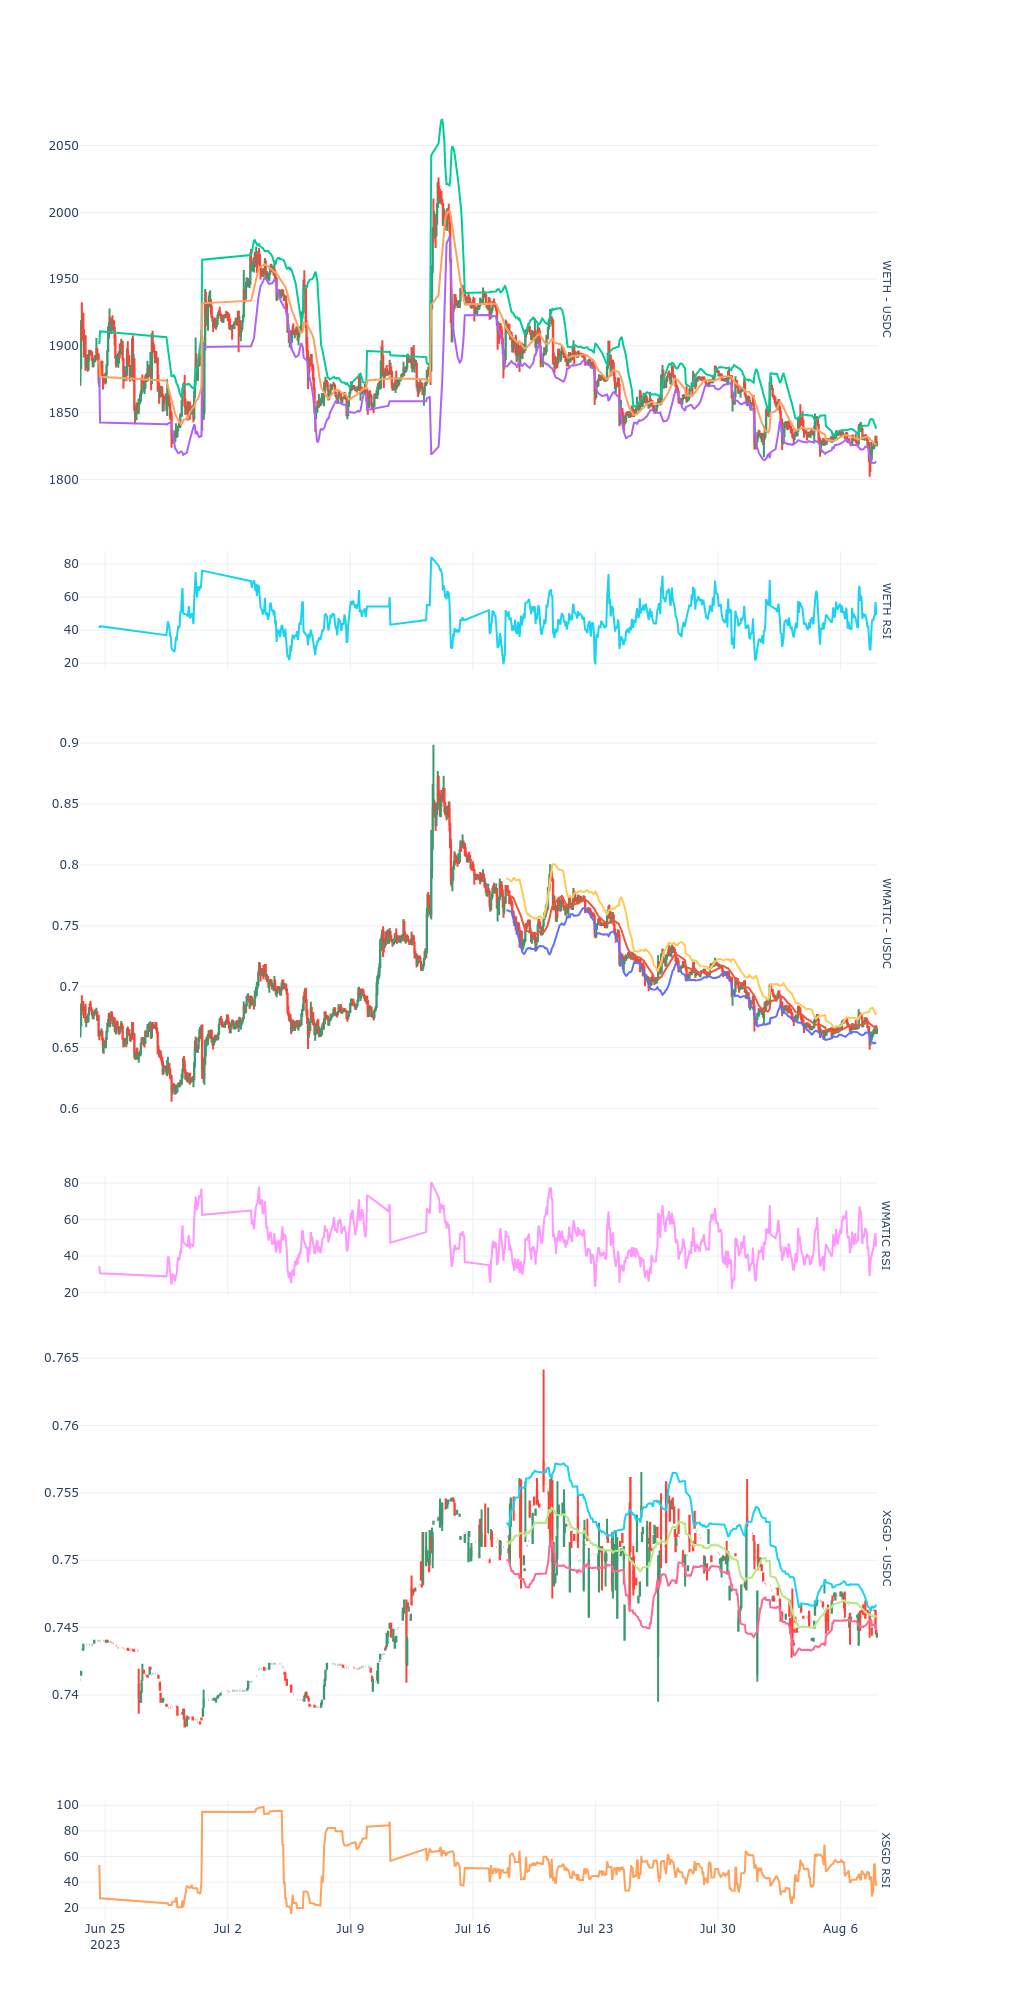

In [3]:
from tradeexecutor.visual.multiple_pairs import visualise_multiple_pairs

visualise_multiple_pairs(
    state, 
    universe.universe.candles,
    show_trades=False
)

The next method of visualising the strategy zooms in on the most recent trading data. 

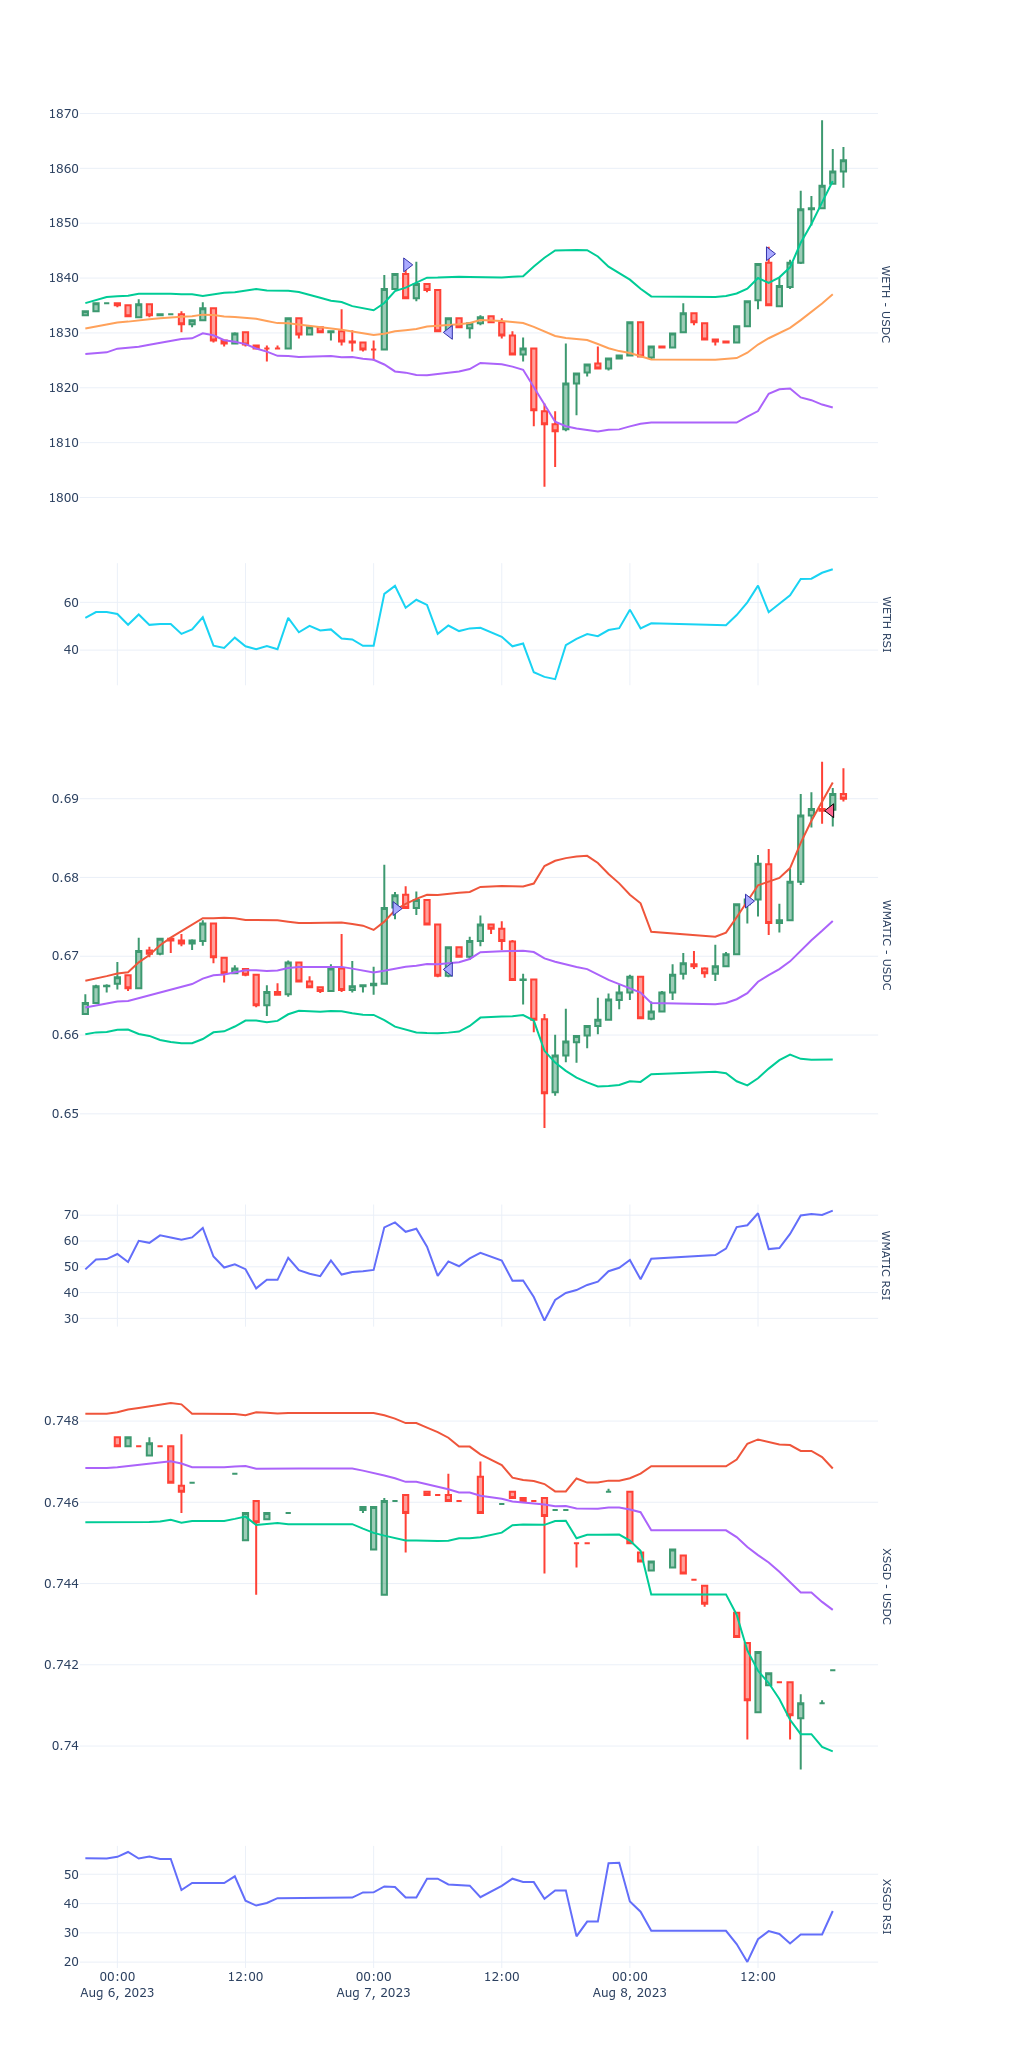

In [4]:
from tradeexecutor.visual.strategy_state import draw_multi_pair_strategy_state

draw_multi_pair_strategy_state(state, universe)